In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import seaborn as sns

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("Data/Time_series_analysis_and_forecast_DATASET.csv", parse_dates = ["FullDate"], index_col = "FullDate")
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
#Upsample to daily data points 
df1 = df.resample('D').sum()

In [4]:
df1

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


Using Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [5]:
# For sysload
result1 = adfuller(df1["SysLoad"])

In [6]:
# For gas price
result2 = adfuller(df1["GasPrice"])

### Solving for p value

In [7]:
# For sysload
result1[1]

0.004253725504574031

In [8]:
# For gas price
result2[1]

0.045027212884625675

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [9]:
# For ElecPrice
result3 = adfuller(df1["ElecPrice"])

In [10]:
# For ElecPrice
result3[4]

{'1%': -3.432066157296446,
 '5%': -2.8622983040036005,
 '10%': -2.5671736550459663}

In [11]:
# For gas price
result2[4]

{'1%': -3.4320693157877544,
 '5%': -2.8622996992165364,
 '10%': -2.5671743978048323}

### For Univariate Dataset

### Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [12]:
df1.reset_index(inplace = True)

In [13]:
df1

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38000,88.5600,2751.700
1,2010-09-02,369.6,38898.99000,88.5600,570.810
2,2010-09-03,439.2,41665.76000,106.8000,504.975
3,2010-09-04,328.8,35638.08500,81.3600,502.275
4,2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000,634.770
3830,2021-02-25,518.4,4539.07855,130.5048,577.515
3831,2021-02-26,547.2,9517.02430,130.1808,1445.495
3832,2021-02-27,564.0,4932.88015,130.0800,488.980


In [14]:
df2 = df1.loc[:, ["FullDate","ElecPrice"]]
df2

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555
...,...,...
3829,2021-02-24,634.770
3830,2021-02-25,577.515
3831,2021-02-26,1445.495
3832,2021-02-27,488.980


In [15]:
df2 = df2.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" }) 
df2.head() 

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [16]:
df2_Train = df2.iloc[0:2757]
df2_Test = df2.iloc[2758:]

In [17]:
#Define the model
model = Prophet()

In [18]:
model.fit(df2_Train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
df3_Test = df2_Test.loc[:, ['ds']]

In [20]:
df3_Test

,ds
2758,2018-03-21
2759,2018-03-22
2760,2018-03-23
2761,2018-03-24
2762,2018-03-25
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [21]:
df3_Test['ds'] = pd.to_datetime(df3_Test['ds'])

In [22]:
df3_Test.reset_index(drop = True, inplace = True)

In [23]:
df3_Test

,ds
0,2018-03-21
1,2018-03-22
2,2018-03-23
3,2018-03-24
4,2018-03-25
...,...
1071,2021-02-24
1072,2021-02-25
1073,2021-02-26
1074,2021-02-27


In [24]:
#Predict using the future dataframe
forecast = model.predict(df3_Test)

In [25]:
#Extract the yhat values of the forecast
y_pred = forecast['yhat'].values

In [26]:
y_pred

array([2677.40628297, 2776.31590104, 2568.35438325, ..., 3260.71862362,
       2917.36944558, 2829.30217314])

In [27]:
y_true = df2_Test["y"]

In [28]:
#Find MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape = (mean_absolute_percentage_error(y_true, y_pred))*100
round(mape, 2)

542.17

### What is the RMSE in 2 decimal places?

In [29]:
se = np.square(y_pred - y_true)
mse = np.mean(se)
rmse = np.sqrt(mse)

In [30]:
round(rmse, 2)

3203.16

### If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

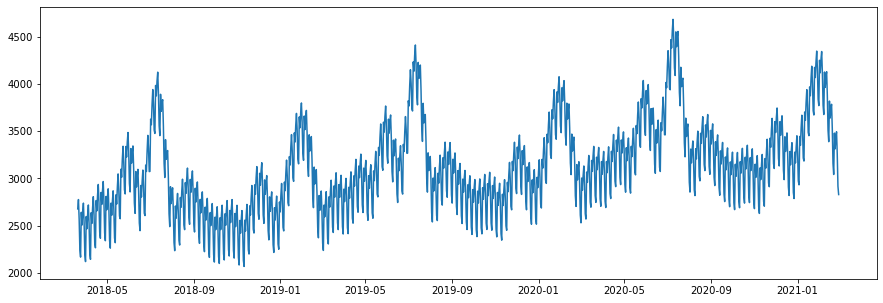

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df3_Test['ds'], y_pred)

### For Multivariate Time Series

In [32]:
df1.rename(columns = {"FullDate":"ds", "ElecPrice":"y"}, inplace = True)

In [33]:
df1.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [34]:
df4_Train = df1.iloc[0:2757]
df4_Test = df1.iloc[2758:]

In [35]:
#Define the model
m = Prophet()
m.add_regressor('Tmax')
m.add_regressor('SysLoad')
m.add_regressor('GasPrice')
m.fit(df4_Train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
df5_Test = df4_Test[["ds", "Tmax","SysLoad","GasPrice"]]

In [37]:
df5_Test

,ds,Tmax,SysLoad,GasPrice
2758,2018-03-21,571.2,4658.05865,203.2560
2759,2018-03-22,722.4,19161.78525,203.2560
2760,2018-03-23,811.2,18090.43435,198.6456
2761,2018-03-24,832.8,3763.53865,180.2160
2762,2018-03-25,530.4,-5111.63840,180.0000
...,...,...,...,...
3829,2021-02-24,537.6,-1525.49745,134.4000
3830,2021-02-25,518.4,4539.07855,130.5048
3831,2021-02-26,547.2,9517.02430,130.1808
3832,2021-02-27,564.0,4932.88015,130.0800


In [38]:
df5_Test.reset_index(drop = True, inplace = True)

In [39]:
#Predict using the future dataframe
forecast = m.predict(df5_Test)

In [40]:
#Extract the yhat values of the forecast
y_pred1 = forecast['yhat'].values

In [41]:
y_pred1

array([1980.23460436, 2900.74543976, 2585.05007655, ..., 1390.16463018,
       1045.10263394, 1205.60158446])

In [42]:
y_true1 = df4_Test['y'].values

In [43]:
# Find mape
mape1 = (mean_absolute_percentage_error(y_true1, y_pred1))*100
round(mape1, 2)

233.45

In [44]:
# Find RMSE
SE = np.square(y_pred1 - y_true1)
MSE = np.mean(SE)
RMSE = np.sqrt(MSE)

In [45]:
round(RMSE, 2)

2710.3

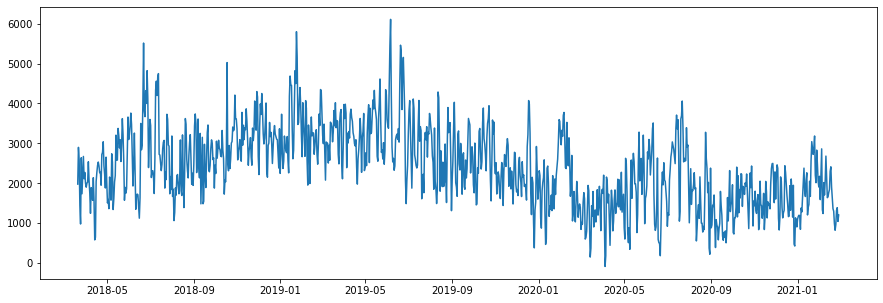

In [46]:
plt.figure(figsize=(15,5))
plt.plot(df4_Test['ds'], y_pred1)

### Excluding TMAX From Training Data

In [47]:
df1.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [48]:
df6 = df1.drop(columns = "Tmax", axis = 1)
df6.head()

,ds,SysLoad,GasPrice,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [49]:
df6_Train = df1.iloc[0:2757]
df6_Test = df1.iloc[2758:]

In [50]:
#Define the model
m1 = Prophet()
m1.add_regressor('SysLoad')
m1.add_regressor('GasPrice')
m1.fit(df6_Train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
df7_Test = df6_Test[["ds","SysLoad","GasPrice"]]

In [52]:
df7_Test

,ds,SysLoad,GasPrice
2758,2018-03-21,4658.05865,203.2560
2759,2018-03-22,19161.78525,203.2560
2760,2018-03-23,18090.43435,198.6456
2761,2018-03-24,3763.53865,180.2160
2762,2018-03-25,-5111.63840,180.0000
...,...,...,...
3829,2021-02-24,-1525.49745,134.4000
3830,2021-02-25,4539.07855,130.5048
3831,2021-02-26,9517.02430,130.1808
3832,2021-02-27,4932.88015,130.0800


In [53]:
df7_Test.reset_index(drop = True, inplace = True)

In [54]:
#Predict using the future dataframe
forecast1 = m1.predict(df7_Test)

In [55]:
#Extract the yhat values of the forecast
y_pred2 = forecast1['yhat'].values

In [56]:
y_pred2 

array([1985.0409568 , 2905.0206227 , 2589.75527161, ..., 1404.13695845,
       1058.70439941, 1219.93881756])

In [57]:
y_true2 = df6_Test['y'].values

In [58]:
# Find mape
mape2 = (mean_absolute_percentage_error(y_true2, y_pred2))*100
round(mape2, 2)

235.79